In [58]:
## import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
import numpy as np

In [8]:
##Load and display data
df=pd.read_csv("D:/company_data.csv")
print(df.head(2))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  


In [60]:
## check wether data is clean or not
df.isnull().sum()

Sales             0
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    0
dtype: int64

In [62]:
## conver sales to Sales_categoty  target variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 50, 100, 150, 200], labels=['Low', 'Medium', 'High', 'Very High'])


In [64]:
# Encode the 'Sales_Category' column
le = LabelEncoder()
df['Sales_Category'] = le.fit_transform(df['Sales_Category'])

In [66]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)


In [68]:
# Check the data types to confirm all categorical variables are encoded
df_encoded.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Sales_Category        int32
ShelveLoc_Good         bool
ShelveLoc_Medium       bool
Urban_Yes              bool
US_Yes                 bool
dtype: object

In [70]:
## define features and target variable
X = df_encoded.drop('Sales_Category', axis=1)
 # Features
y = df_encoded['Sales_Category']  # Categorical target

In [72]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [74]:
## Define random forest model
model = RandomForestClassifier(criterion='gini')

In [76]:
## fitting the X_train y_train dataset in model
model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
## Check model score
model.score(X_train,y_train)

1.0

In [80]:
## predictions for model
predictions = model.predict(X_test)
predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
## check Accuracy score
accuracy_score(y_test, predictions)

1.0

In [86]:
# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("MSE for Random Forest classification - ", mse)

# Calculate RMSE
rmse = np.sqrt(mse)

print("RMSE for Random Forest classification - ", rmse)


MSE for Random Forest classification -  0.0
RMSE for Random Forest classification -  0.0


In [42]:
## Confusion matrix
confusion_matrix(y_test, predictions)

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[80]], dtype=int64)

In [88]:
##feature importance
model.feature_importances_

array([0.30406954, 0.0751262 , 0.15062226, 0.03251438, 0.03742186,
       0.19037968, 0.1373806 , 0.03940221, 0.0121347 , 0.00811524,
       0.00418001, 0.00865334])

<Axes: >

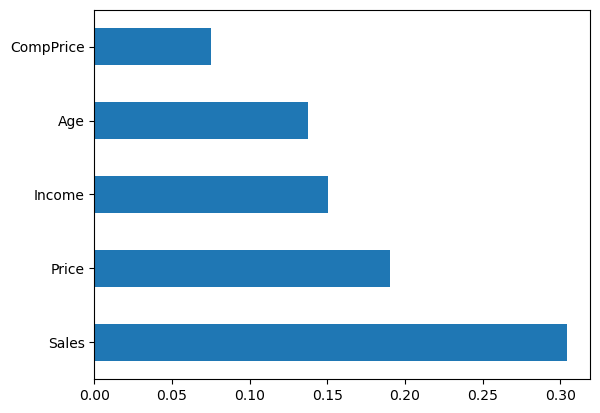

In [86]:
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.nlargest(5).plot(kind = 'barh')
